# Python 프로그래밍 Pandas
## 데이터프레임 Dataframe

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Pandas 란
- 다른 Dataframe이나 고차원 객체로부터 컬럼을 추가 삭제
- group by함수
- 라벨 등을 이용한 데이터 부분 집합 추출
- 데이터 세로 가로 합치기
- 외부 데이터 연동의 견고함(CSV, Excel, databases, HDF5지원)
- missing data(NaN) 처리

In [69]:
import platform
print(platform.system())

Linux


# 2. 외부데이터 읽기(csv, 읽고 쓰기)
- 공공데이터 자료 읽기
- [Obtain data](https://www.data.go.kr/data/15070340/fileData.do)
  >>> 21,20,19년도 3년치를 받아라

In [70]:
import pandas as pd

In [71]:
import glob
glob.glob('/content/*.csv')

['/content/도로교통공단_사망 교통사고 정보_20221231.csv',
 '/content/사망교통사고정보(2021).csv',
 '/content/도로교통공단_사망교통사고정보(2019).csv']

In [72]:
files = glob.glob('/content/*.csv')
files

['/content/도로교통공단_사망 교통사고 정보_20221231.csv',
 '/content/사망교통사고정보(2021).csv',
 '/content/도로교통공단_사망교통사고정보(2019).csv']

In [76]:
pd.read_csv(files[0], encoding='euc-kr')

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2022,2022-01-01 10:00,주,토,1,0,0,0,0,전남,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,1000059,1660526,127.500646,34.939564
1,2022,2022-01-01 14:00,주,토,1,0,0,0,0,전북,...,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차,965929,1760951,127.122710,35.844490
2,2022,2022-01-01 17:00,주,토,1,0,0,0,0,경기,...,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,966667,2021002,127.119365,38.188669
3,2022,2022-01-01 20:00,야,토,1,0,0,0,0,부산,...,기타,안전운전 의무 불이행,단일로,고가도로위,승용차,승용차,1156990,1697307,129.225773,35.258920
4,2022,2022-01-02 06:00,주,일,1,0,0,0,0,서울,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,950217,1953529,126.936182,37.579800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2022,2022-12-30 06:00,주,금,1,0,0,0,0,경기,...,측면충돌,안전운전 의무 불이행,단일로,기타단일로,자전거,화물차,961179,1968034,127.059557,37.711064
2654,2022,2022-12-30 16:00,주,금,1,0,0,0,0,경기,...,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,948521,2003558,126.913420,38.030605
2655,2022,2022-12-30 23:00,야,금,1,1,0,1,0,서울,...,측면충돌,신호위반,교차로,교차로내,승용차,승합차,953659,1945091,126.975696,37.503926
2656,2022,2022-12-31 05:00,야,토,1,0,0,0,0,전북,...,측면충돌,신호위반,교차로,교차로횡단보도내,승용차,자전거,967119,1759855,127.135932,35.834649


In [126]:
for i in files:
    df = pd.read_csv(i, encoding='cp949')
    print(df.shape)
    print(df.columns)

(2658, 23)
Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')
(2816, 23)
Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도'],
      dtype='object')
(3233, 23)
Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')


In [127]:
files

['/content/도로교통공단_사망 교통사고 정보_20221231.csv',
 '/content/사망교통사고정보(2021).csv',
 '/content/도로교통공단_사망교통사고정보(2019).csv']

In [233]:
df = pd.DataFrame()
sum = 0

for i in files:
    tf = pd.read_csv(i, encoding='cp949')
    print(tf.shape)
    sum += tf.shape[0]
    print(tf.columns)
    df = pd.concat([df, tf])
    print(df.shape)

print(sum)

(2658, 23)
Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')
(2658, 23)
(2816, 23)
Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도'],
      dtype='object')
(5474, 25)
(3233, 23)
Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')
(8707, 25)
8707


In [234]:
df.shape

(8707, 25)

In [235]:
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
0,2022,2022-01-01 10:00,주,토,1,0,0,0,0,전남,...,단일로,교량위,승용차,없음,1000059.0,1660526.0,127.500646,34.939564,NaN,NaN
1,2022,2022-01-01 14:00,주,토,1,0,0,0,0,전북,...,단일로,기타단일로,원동기장치자전거,승용차,965929.0,1760951.0,127.122710,35.844490,NaN,NaN
2,2022,2022-01-01 17:00,주,토,1,0,0,0,0,경기,...,단일로,기타단일로,이륜차,없음,966667.0,2021002.0,127.119365,38.188669,NaN,NaN
3,2022,2022-01-01 20:00,야,토,1,0,0,0,0,부산,...,단일로,고가도로위,승용차,승용차,1156990.0,1697307.0,129.225773,35.258920,NaN,NaN
4,2022,2022-01-02 06:00,주,일,1,0,0,0,0,서울,...,단일로,기타단일로,승합차,보행자,950217.0,1953529.0,126.936182,37.579800,NaN,NaN


In [144]:
import os
os.makedirs('./output', exist_ok=True)

In [145]:
df.to_csv('./output/mydata.csv')

In [237]:
## 압축파일로 저장
df.to_pickle('./output/traffic.pkl')

# 다운로드받아 나중에 사용하라

엑셀로 읽고 쓰기를 할 경우
- pd.read_excel('/~.xlsx')
- data.to_excel('/~.xlsx')

# 3. 상세 정보확인

## 3.1 내용 확인

In [146]:
df.head()
df.tail()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
0,2022,2022-01-01 10:00,주,토,1,0,0,0,0,전남,...,단일로,교량위,승용차,없음,1000059.0,1660526.0,127.500646,34.939564,NaN,NaN
1,2022,2022-01-01 14:00,주,토,1,0,0,0,0,전북,...,단일로,기타단일로,원동기장치자전거,승용차,965929.0,1760951.0,127.122710,35.844490,NaN,NaN
2,2022,2022-01-01 17:00,주,토,1,0,0,0,0,경기,...,단일로,기타단일로,이륜차,없음,966667.0,2021002.0,127.119365,38.188669,NaN,NaN
3,2022,2022-01-01 20:00,야,토,1,0,0,0,0,부산,...,단일로,고가도로위,승용차,승용차,1156990.0,1697307.0,129.225773,35.258920,NaN,NaN
4,2022,2022-01-02 06:00,주,일,1,0,0,0,0,서울,...,단일로,기타단일로,승합차,보행자,950217.0,1953529.0,126.936182,37.579800,NaN,NaN


,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
3228,2019,2019-12-31 05,야,화,1,0,0,0,0,서울,...,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819,NaN,NaN
3229,2019,2019-12-31 08,주,화,1,1,0,1,0,강원,...,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411,NaN,NaN
3230,2019,2019-12-31 12,주,화,1,1,0,0,1,경북,...,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434,NaN,NaN
3231,2019,2019-12-31 12,주,화,1,1,0,1,0,울산,...,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292,NaN,NaN
3232,2019,2019-12-31 16,주,화,1,0,0,0,0,경남,...,단일로,기타단일로,승용차,원동기장치자전거,1098444.0,1693616.0,128.581874,35.233112,NaN,NaN


## 3.2 크기 확인

In [147]:
df.shape
df.index
df.columns

(8707, 25)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232],
      dtype='int64', length=8707)

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [148]:
df.values

array([[2022, '2022-01-01 10:00', '주', ..., 34.9395644, nan, nan],
       [2022, '2022-01-01 14:00', '주', ..., 35.84448986, nan, nan],
       [2022, '2022-01-01 17:00', '주', ..., 38.18866892, nan, nan],
       ...,
       [2019, '2019-12-31 12', '주', ..., 35.98843432, nan, nan],
       [2019, '2019-12-31 12', '주', ..., 35.57029182, nan, nan],
       [2019, '2019-12-31 16', '주', ..., 35.23311197, nan, nan]],
      dtype=object)

In [149]:
len(df)
len(df.index)
len(df.columns)

8707

8707

25

## 3.3 기본 속성 확인

In [150]:
df.describe()
# df.describe(include='all')

,발생년,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,5.891000e+03,5.891000e+03,8707.000000,8707.000000,2.816000e+03,2.816000e+03
mean,2020.562651,1.033651,0.488228,0.195819,0.262662,0.029746,1.005431e+06,1.820886e+06,127.560596,36.380486,1.006206e+06,1.820282e+06
std,1.264683,0.223051,1.605883,0.697797,1.059037,0.321754,7.723058e+04,1.173329e+05,0.860196,1.057672,7.807702e+04,1.169329e+05
min,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.521000e+05,1.470330e+06,124.678090,33.217963,7.530210e+05,1.470724e+06
25%,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.456810e+05,1.724212e+06,126.886360,35.502934,9.447632e+05,1.723195e+06
50%,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.745510e+05,1.830057e+06,127.223004,36.457815,9.772510e+05,1.827476e+06
75%,2022.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.073347e+06,1.932194e+06,128.310898,37.390435,1.072172e+06,1.932889e+06
max,2022.000000,7.000000,59.000000,19.000000,40.000000,15.000000,1.184860e+06,2.056736e+06,130.848457,38.507834,1.296157e+06,2.046108e+06


In [151]:
type(df.describe())

pandas.core.frame.DataFrame

In [152]:
df.describe().index
df.describe().columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

Index(['발생년', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [153]:
df.dtypes

발생년              int64
발생년월일시          object
주야              object
요일              object
사망자수             int64
부상자수             int64
중상자수             int64
경상자수             int64
부상신고자수           int64
발생지시도           object
발생지시군구          object
사고유형_대분류        object
사고유형_중분류        object
사고유형            object
가해자법규위반         object
도로형태_대분류        object
도로형태            object
가해자_당사자종별       object
피해자_당사자종별       object
발생위치X_UTMK     float64
발생위치Y_UTMK     float64
경도             float64
위도             float64
발생위치X(UTMK)    float64
발생위치Y(UTMK)    float64
dtype: object

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 0 to 3232
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          8707 non-null   int64  
 1   발생년월일시       8707 non-null   object 
 2   주야           8707 non-null   object 
 3   요일           8707 non-null   object 
 4   사망자수         8707 non-null   int64  
 5   부상자수         8707 non-null   int64  
 6   중상자수         8707 non-null   int64  
 7   경상자수         8707 non-null   int64  
 8   부상신고자수       8707 non-null   int64  
 9   발생지시도        8707 non-null   object 
 10  발생지시군구       8707 non-null   object 
 11  사고유형_대분류     8707 non-null   object 
 12  사고유형_중분류     8707 non-null   object 
 13  사고유형         8707 non-null   object 
 14  가해자법규위반      8707 non-null   object 
 15  도로형태_대분류     8707 non-null   object 
 16  도로형태         8707 non-null   object 
 17  가해자_당사자종별    8707 non-null   object 
 18  피해자_당사자종별    8707 non-null   object 
 19  발생위치X_UTMK 

In [155]:
df.count()

발생년            8707
발생년월일시         8707
주야             8707
요일             8707
사망자수           8707
부상자수           8707
중상자수           8707
경상자수           8707
부상신고자수         8707
발생지시도          8707
발생지시군구         8707
사고유형_대분류       8707
사고유형_중분류       8707
사고유형           8707
가해자법규위반        8707
도로형태_대분류       8707
도로형태           8707
가해자_당사자종별      8707
피해자_당사자종별      8707
발생위치X_UTMK     5891
발생위치Y_UTMK     5891
경도             8707
위도             8707
발생위치X(UTMK)    2816
발생위치Y(UTMK)    2816
dtype: int64

In [156]:
df.nunique()

발생년               3
발생년월일시         7261
주야                2
요일                7
사망자수              7
부상자수             25
중상자수             14
경상자수             20
부상신고자수           11
발생지시도            17
발생지시군구          207
사고유형_대분류          4
사고유형_중분류         15
사고유형             16
가해자법규위반           8
도로형태_대분류          5
도로형태             11
가해자_당사자종별        14
피해자_당사자종별        16
발생위치X_UTMK     5808
발생위치Y_UTMK     5838
경도             8704
위도             8707
발생위치X(UTMK)    2797
발생위치Y(UTMK)    2808
dtype: int64

## 3.4 결측치 확인

In [157]:
df.isnull()
# df.isnull().head(3)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3230,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3231,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [158]:
df.notnull()
df.notnull()*1

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
3229,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
3230,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
3231,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False


,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3229,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3230,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3231,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [159]:
df.isnull().sum()

발생년               0
발생년월일시            0
주야                0
요일                0
사망자수              0
부상자수              0
중상자수              0
경상자수              0
부상신고자수            0
발생지시도             0
발생지시군구            0
사고유형_대분류          0
사고유형_중분류          0
사고유형              0
가해자법규위반           0
도로형태_대분류          0
도로형태              0
가해자_당사자종별         0
피해자_당사자종별         0
발생위치X_UTMK     2816
발생위치Y_UTMK     2816
경도                0
위도                0
발생위치X(UTMK)    5891
발생위치Y(UTMK)    5891
dtype: int64

## 3.5 aggregate 함수로 기본 통계 확인

In [160]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [161]:
df['사망자수']
type(df['사망자수'])  # 시리즈

0       1
1       1
2       1
3       1
4       1
       ..
3228    1
3229    1
3230    1
3231    1
3232    1
Name: 사망자수, Length: 8707, dtype: int64

pandas.core.series.Series

In [162]:
df['사망자수'].sum()

9000

In [163]:
df['사망자수'].mean()
df['사망자수'].std()
df['사망자수'].count()
df['사망자수'].median()
df['사망자수'].quantile([0.25, 0.5])
df['사망자수'].max()
df['사망자수'].min()

1.0336510853336396

0.22305138845707906

8707

1.0

0.25    1.0
0.50    1.0
Name: 사망자수, dtype: float64

7

1

In [164]:
df['사망자수'].isnull()
df['사망자수'].isnull().sum()
df['사망자수'].notnull().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
3228    False
3229    False
3230    False
3231    False
3232    False
Name: 사망자수, Length: 8707, dtype: bool

0

8707

## 3.6 컬럼(변수)의 유형별 빈도 확인

In [165]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [166]:
df['요일'].value_counts()
df['요일'].value_counts().index
df['요일'].value_counts().values

요일
금    1356
목    1322
월    1313
화    1270
수    1266
토    1179
일    1001
Name: count, dtype: int64

Index(['금', '목', '월', '화', '수', '토', '일'], dtype='object', name='요일')

array([1356, 1322, 1313, 1270, 1266, 1179, 1001])

In [167]:
df['요일'].value_counts()['수']
df['요일'].value_counts().sort_values()
df['요일'].value_counts().sort_values(ascending=False)
df['요일'].value_counts().sort_index()

1266

요일
일    1001
토    1179
수    1266
화    1270
월    1313
목    1322
금    1356
Name: count, dtype: int64

요일
금    1356
목    1322
월    1313
화    1270
수    1266
토    1179
일    1001
Name: count, dtype: int64

요일
금    1356
목    1322
수    1266
월    1313
일    1001
토    1179
화    1270
Name: count, dtype: int64

## 3.7 시각화

<Axes: >

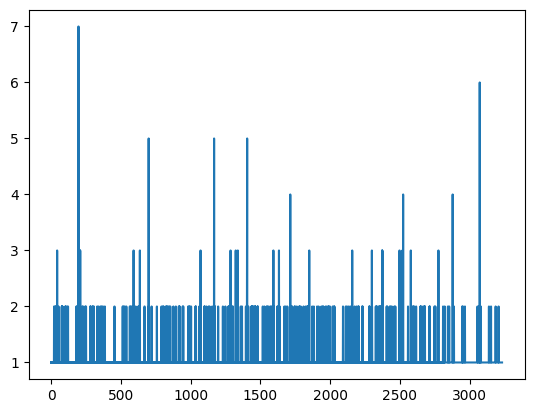

In [168]:
df['사망자수'].plot()

<Axes: >

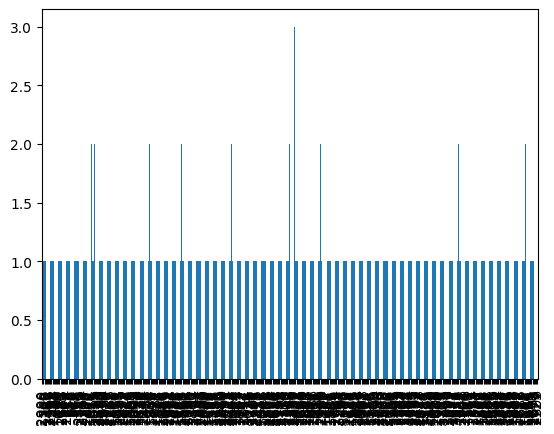

In [169]:
df['사망자수'].sample(frac=0.05).plot(kind='bar')

<Axes: ylabel='Frequency'>

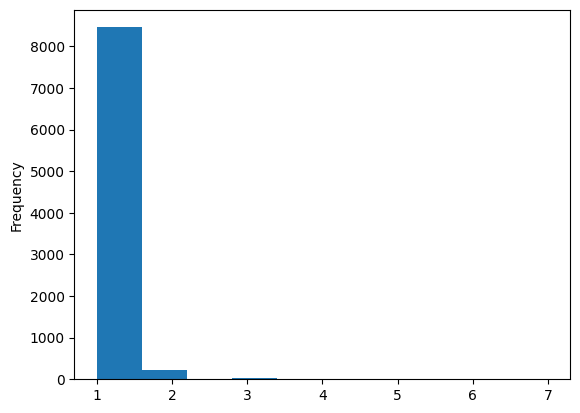

In [170]:
df['사망자수'].plot(kind='hist')

<Axes: ylabel='Frequency'>

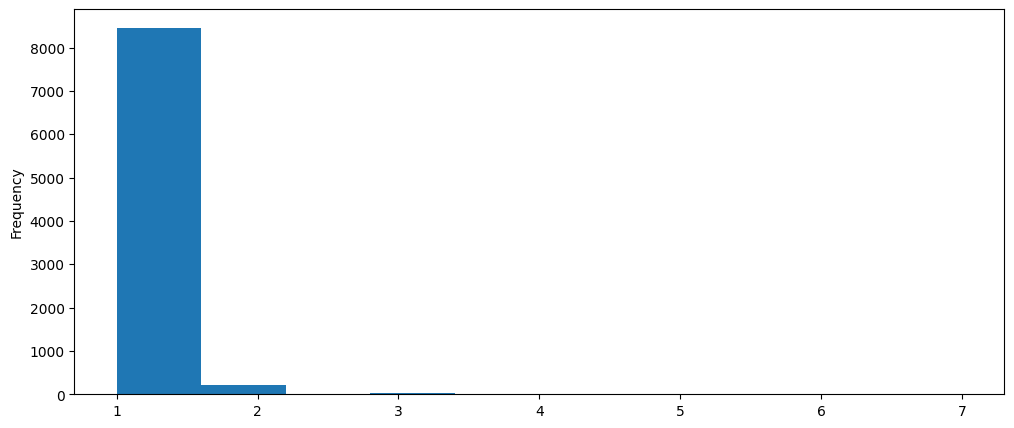

In [171]:
df['사망자수'].plot(kind='hist', figsize=(12,5))

In [172]:
import warnings
warnings.filterwarnings(action='ignore')

요일
금    1356
목    1322
월    1313
화    1270
수    1266
토    1179
일    1001
Name: count, dtype: int64

<Axes: xlabel='요일'>

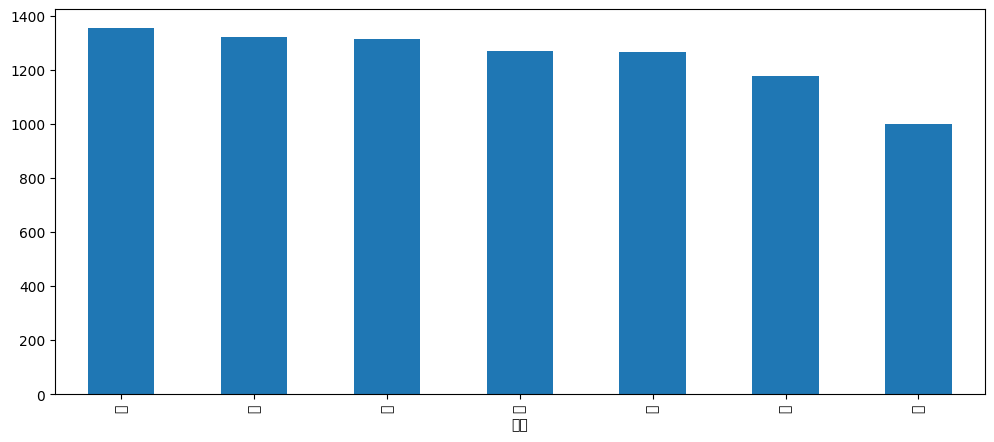

In [173]:
df['요일'].value_counts()
df['요일'].value_counts().plot(kind='bar', figsize=(12,5))

In [174]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 안깨지기

<Axes: xlabel='요일'>

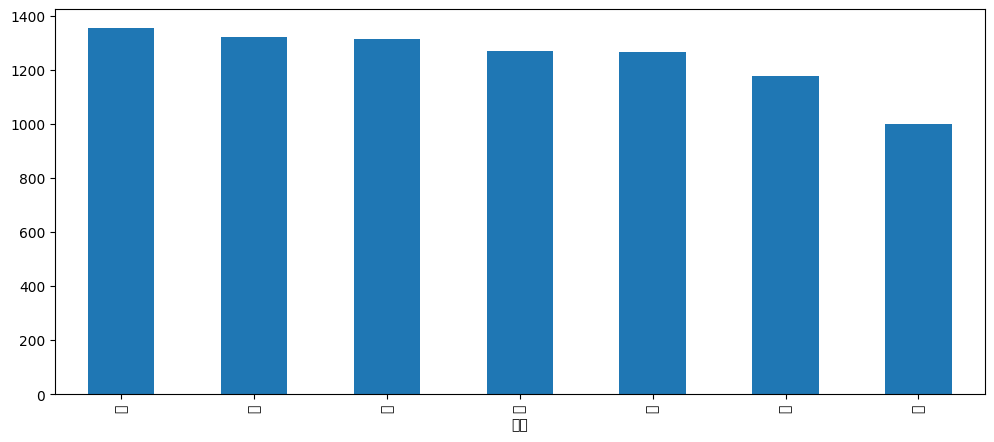

In [175]:
df['요일'].value_counts().plot(kind='bar', figsize=(12,5))

In [176]:
df.tail()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK)
3228,2019,2019-12-31 05,야,화,1,0,0,0,0,서울,...,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819,NaN,NaN
3229,2019,2019-12-31 08,주,화,1,1,0,1,0,강원,...,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411,NaN,NaN
3230,2019,2019-12-31 12,주,화,1,1,0,0,1,경북,...,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434,NaN,NaN
3231,2019,2019-12-31 12,주,화,1,1,0,1,0,울산,...,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292,NaN,NaN
3232,2019,2019-12-31 16,주,화,1,0,0,0,0,경남,...,단일로,기타단일로,승용차,원동기장치자전거,1098444.0,1693616.0,128.581874,35.233112,NaN,NaN


# 4. groupby

## unstack()

In [177]:
df.groupby('발생년').사고유형.count()

발생년
2019    3233
2021    2816
2022    2658
Name: 사고유형, dtype: int64

In [178]:
df.groupby('발생년').사고유형.value_counts()

발생년   사고유형      
2019  기타            694
      횡단중           649
      측면충돌          519
      추돌            361
      공작물충돌         308
      정면충돌          200
      차도통행중         178
      전도             98
      도로이탈 추락        93
      길가장자리구역통행중     40
      보도통행중          35
      전복             33
      도로이탈 기타        18
      주/정차차량 충돌       5
      후진중충돌           1
      철길건널목           1
2021  기타            712
      횡단중           441
      측면충돌          394
      추돌            355
      공작물충돌         326
      정면충돌          191
      차도통행중         146
      전도             81
      도로이탈 추락        67
      전복             30
      길가장자리구역통행중     30
      보도통행중          21
      도로이탈 기타        17
      주/정차차량 충돌       3
      후진중충돌           2
2022  기타            631
      횡단중           431
      측면충돌          382
      추돌            316
      공작물충돌         304
      정면충돌          175
      차도통행중         148
      전도             82
      도로이탈 추락        78
      길가장자리구역통행중     41

In [179]:
df.groupby('발생년').사고유형.value_counts().unstack()

사고유형,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
발생년,,,,,,,,,,,,,,,,
2019,308.0,694.0,40.0,18.0,93.0,35.0,98.0,33.0,200.0,5.0,178.0,1.0,361.0,519.0,649.0,1.0
2021,326.0,712.0,30.0,17.0,67.0,21.0,81.0,30.0,191.0,3.0,146.0,NaN,355.0,394.0,441.0,2.0
2022,304.0,631.0,41.0,18.0,78.0,24.0,82.0,16.0,175.0,4.0,148.0,2.0,316.0,382.0,431.0,6.0


In [180]:
df.groupby('발생년').사고유형.value_counts().unstack().fillna(0)

사고유형,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
발생년,,,,,,,,,,,,,,,,
2019,308.0,694.0,40.0,18.0,93.0,35.0,98.0,33.0,200.0,5.0,178.0,1.0,361.0,519.0,649.0,1.0
2021,326.0,712.0,30.0,17.0,67.0,21.0,81.0,30.0,191.0,3.0,146.0,0.0,355.0,394.0,441.0,2.0
2022,304.0,631.0,41.0,18.0,78.0,24.0,82.0,16.0,175.0,4.0,148.0,2.0,316.0,382.0,431.0,6.0


## 5. 컬럼명 바꾸기

In [181]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [182]:
df.rename(columns = {'발생년' : '사고년도', '사고유형':'사고유형구분'}, inplace = True)

In [183]:
pd.crosstab(df.사고년도, df.사고유형구분)

사고유형구분,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
사고년도,,,,,,,,,,,,,,,,
2019,308,694,40,18,93,35,98,33,200,5,178,1,361,519,649,1
2021,326,712,30,17,67,21,81,30,191,3,146,0,355,394,441,2
2022,304,631,41,18,78,24,82,16,175,4,148,2,316,382,431,6


In [185]:
df.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'], aggfunc='count')

사고유형구분,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
사고년도,,,,,,,,,,,,,,,,
2019,308.0,694.0,40.0,18.0,93.0,35.0,98.0,33.0,200.0,5.0,178.0,1.0,361.0,519.0,649.0,1.0
2021,326.0,712.0,30.0,17.0,67.0,21.0,81.0,30.0,191.0,3.0,146.0,NaN,355.0,394.0,441.0,2.0
2022,304.0,631.0,41.0,18.0,78.0,24.0,82.0,16.0,175.0,4.0,148.0,2.0,316.0,382.0,431.0,6.0


In [187]:
df.columns

Index(['사고년도', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [188]:
df.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형_중분류'])

사고유형_중분류,공작물충돌,기타,길가장자리구역통행중,도로이탈,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
사고년도,,,,,,,,,,,,,,,
2019,0.162338,0.216138,0.000000,0.072072,0.057143,0.040816,0.333333,0.765000,0.0,0.067416,0.0,0.772853,0.402697,0.038521,0.000000
2021,0.141104,0.132022,0.100000,0.011905,0.000000,0.037037,0.033333,0.602094,0.0,0.034247,NaN,0.861972,0.337563,0.047619,0.000000
2022,0.055921,0.223455,0.073171,0.072917,0.083333,0.036585,0.000000,0.691429,0.0,0.040541,0.0,0.778481,0.264398,0.018561,0.166667


### groupby, pivot, crosstab 동일한 결과

<Axes: xlabel='사고년도'>

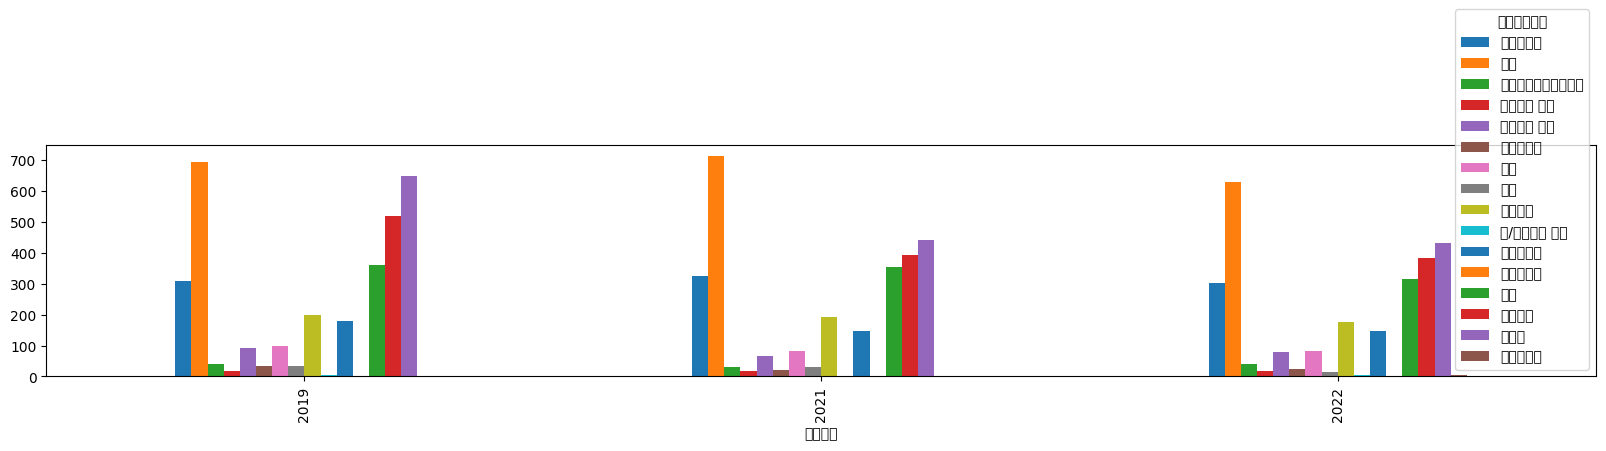

In [189]:
df.groupby('사고년도').사고유형구분.value_counts().unstack().plot(kind='bar', figsize=(20,3))

<Axes: xlabel='사고년도'>

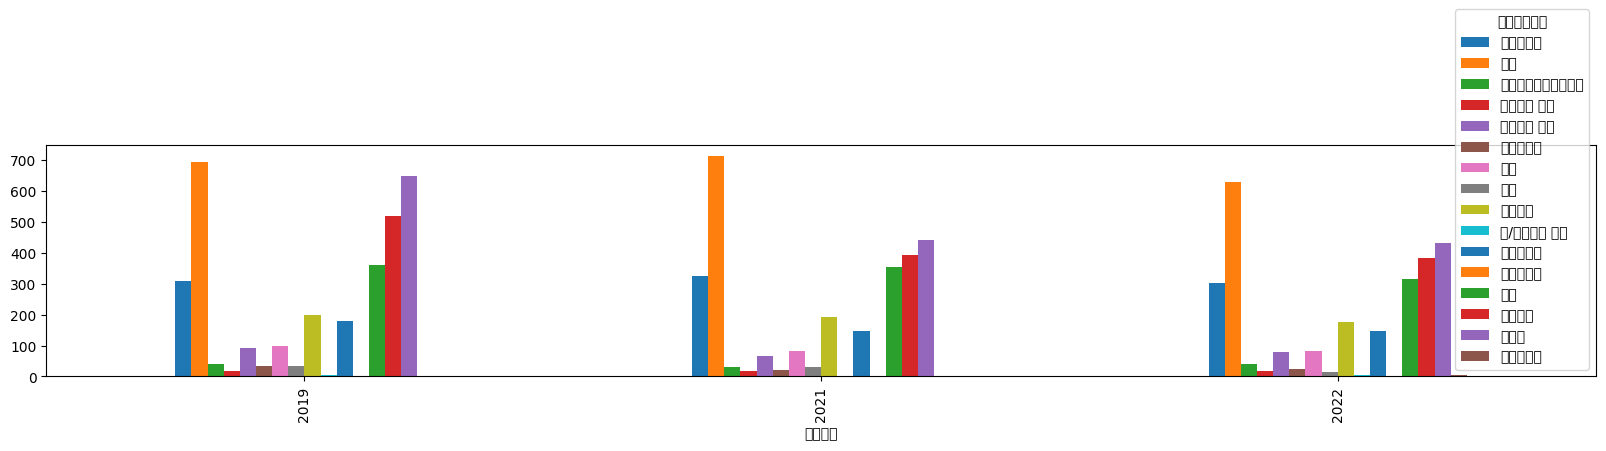

In [191]:
pd.crosstab(df.사고년도, df.사고유형구분).plot(kind='bar', figsize=(20,3))

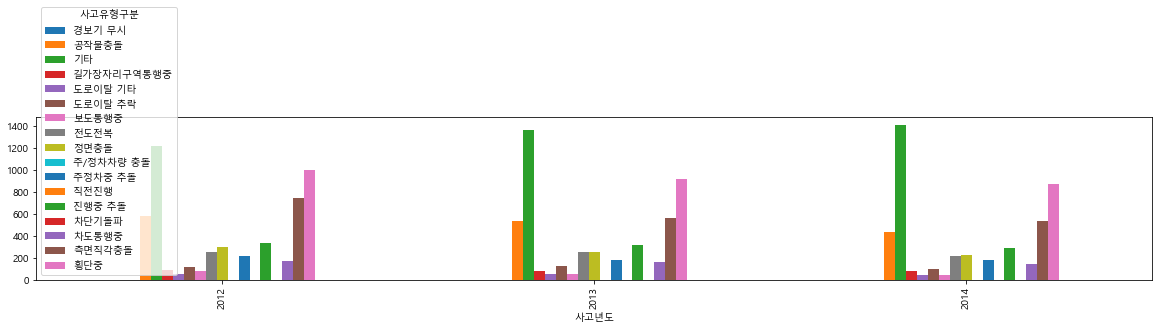

In [ ]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'], aggfunc='count').plot(kind='bar', figsize=(20,3))

In [194]:
df.columns

Index(['사고년도', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

In [195]:
df.groupby('사고유형구분').사망자수.agg(['count', 'median', 'min', 'max', 'mean', 'var', 'std'])

,count,median,min,max,mean,var,std
사고유형구분,,,,,,,
공작물충돌,938,1.0,1,3,1.044776,0.051355,0.226616
기타,2037,1.0,1,6,1.024546,0.037708,0.194184
길가장자리구역통행중,111,1.0,1,2,1.036036,0.035053,0.187225
도로이탈 기타,53,1.0,1,2,1.056604,0.054427,0.233295
도로이탈 추락,238,1.0,1,5,1.058824,0.131546,0.362693
보도통행중,80,1.0,1,2,1.025000,0.024684,0.157110
전도,261,1.0,1,2,1.007663,0.007633,0.087369
전복,79,1.0,1,7,1.113924,0.563778,0.750852
정면충돌,566,1.0,1,5,1.074205,0.111298,0.333614


In [196]:
df.groupby('사고유형구분').사망자수.describe()

,count,mean,std,min,25%,50%,75%,max
사고유형구분,,,,,,,,
공작물충돌,938.0,1.044776,0.226616,1.0,1.0,1.0,1.0,3.0
기타,2037.0,1.024546,0.194184,1.0,1.0,1.0,1.0,6.0
길가장자리구역통행중,111.0,1.036036,0.187225,1.0,1.0,1.0,1.0,2.0
도로이탈 기타,53.0,1.056604,0.233295,1.0,1.0,1.0,1.0,2.0
도로이탈 추락,238.0,1.058824,0.362693,1.0,1.0,1.0,1.0,5.0
보도통행중,80.0,1.025000,0.157110,1.0,1.0,1.0,1.0,2.0
전도,261.0,1.007663,0.087369,1.0,1.0,1.0,1.0,2.0
전복,79.0,1.113924,0.750852,1.0,1.0,1.0,1.0,7.0
정면충돌,566.0,1.074205,0.333614,1.0,1.0,1.0,1.0,5.0


# 6. reset_index(), set_index

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 0 to 3232
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고년도         8707 non-null   int64  
 1   발생년월일시       8707 non-null   object 
 2   주야           8707 non-null   object 
 3   요일           8707 non-null   object 
 4   사망자수         8707 non-null   int64  
 5   부상자수         8707 non-null   int64  
 6   중상자수         8707 non-null   int64  
 7   경상자수         8707 non-null   int64  
 8   부상신고자수       8707 non-null   int64  
 9   발생지시도        8707 non-null   object 
 10  발생지시군구       8707 non-null   object 
 11  사고유형_대분류     8707 non-null   object 
 12  사고유형_중분류     8707 non-null   object 
 13  사고유형구분       8707 non-null   object 
 14  가해자법규위반      8707 non-null   object 
 15  도로형태_대분류     8707 non-null   object 
 16  도로형태         8707 non-null   object 
 17  가해자_당사자종별    8707 non-null   object 
 18  피해자_당사자종별    8707 non-null   object 
 19  발생위치X_UTMK 

In [198]:
df['발생년월일시'].dtypes

dtype('O')

In [202]:
df['발생년월일시']

0       2022-01-01 10:00
1       2022-01-01 14:00
2       2022-01-01 17:00
3       2022-01-01 20:00
4       2022-01-02 06:00
              ...       
3228       2019-12-31 05
3229       2019-12-31 08
3230       2019-12-31 12
3231       2019-12-31 12
3232       2019-12-31 16
Name: 발생년월일시, Length: 8707, dtype: object

날짜형태의 자료로 변경

In [203]:
# df['발생년월일시'] = pd.to_datetime(df['발생년월일시'])
df['발생년월일시'] = pd.to_datetime(df['발생년월일시'], format='%Y-%m-%d')


ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 10:00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [204]:
def parse_datetime(x):
    if len(x) == 13:  # Format is 'YYYY-MM-DD HH'
        x = f'{x}:00'  # Append ':00' to match 'YYYY-MM-DD HH:MM'
    return pd.to_datetime(x, format='%Y-%m-%d %H:%M')

# Apply the function to the '발생년월일시' column
df['발생년월일시'] = df['발생년월일시'].apply(parse_datetime)

df['발생년월일시']

0      2022-01-01 10:00:00
1      2022-01-01 14:00:00
2      2022-01-01 17:00:00
3      2022-01-01 20:00:00
4      2022-01-02 06:00:00
               ...        
3228   2019-12-31 05:00:00
3229   2019-12-31 08:00:00
3230   2019-12-31 12:00:00
3231   2019-12-31 12:00:00
3232   2019-12-31 16:00:00
Name: 발생년월일시, Length: 8707, dtype: datetime64[ns]

In [206]:
df['발생년월일시'].dtypes

dtype('<M8[ns]')

In [207]:
df.columns

Index(['사고년도', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '발생위치X(UTMK)', '발생위치Y(UTMK)'],
      dtype='object')

컬럼 줄이기

In [209]:
df = df[['사고년도', '발생년월일시', '주야', '요일', '사망자수',
             '부상자수', '중상자수', '경상자수', '부상신고자수', '발생지시도',
             '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분']]
df

,사고년도,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2022,2022-01-01 10:00:00,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌
1,2022,2022-01-01 14:00:00,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌
2,2022,2022-01-01 17:00:00,주,토,1,0,0,0,0,경기,연천군,차량단독,도로이탈,도로이탈 추락
3,2022,2022-01-01 20:00:00,야,토,1,0,0,0,0,부산,기장군,차대차,기타,기타
4,2022,2022-01-02 06:00:00,주,일,1,0,0,0,0,서울,서대문구,차대사람,횡단중,횡단중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019-12-31 05:00:00,야,화,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중
3229,2019,2019-12-31 08:00:00,주,화,1,1,0,1,0,강원,양양군,차대차,추돌,추돌
3230,2019,2019-12-31 12:00:00,주,화,1,1,0,0,1,경북,칠곡군,차량단독,공작물충돌,공작물충돌
3231,2019,2019-12-31 12:00:00,주,화,1,1,0,1,0,울산,울주군,차대사람,횡단중,횡단중


In [210]:
df.head(2)

,사고년도,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2022,2022-01-01 10:00:00,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌
1,2022,2022-01-01 14:00:00,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌


In [211]:
df.set_index('발생년월일시')

,사고년도,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
발생년월일시,,,,,,,,,,,,,
2022-01-01 10:00:00,2022,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌
2022-01-01 14:00:00,2022,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌
2022-01-01 17:00:00,2022,주,토,1,0,0,0,0,경기,연천군,차량단독,도로이탈,도로이탈 추락
2022-01-01 20:00:00,2022,야,토,1,0,0,0,0,부산,기장군,차대차,기타,기타
2022-01-02 06:00:00,2022,주,일,1,0,0,0,0,서울,서대문구,차대사람,횡단중,횡단중
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 05:00:00,2019,야,화,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중
2019-12-31 08:00:00,2019,주,화,1,1,0,1,0,강원,양양군,차대차,추돌,추돌
2019-12-31 12:00:00,2019,주,화,1,1,0,0,1,경북,칠곡군,차량단독,공작물충돌,공작물충돌


In [212]:
df.set_index('발생년월일시').reset_index()

,발생년월일시,사고년도,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
0,2022-01-01 10:00:00,2022,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌
1,2022-01-01 14:00:00,2022,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌
2,2022-01-01 17:00:00,2022,주,토,1,0,0,0,0,경기,연천군,차량단독,도로이탈,도로이탈 추락
3,2022-01-01 20:00:00,2022,야,토,1,0,0,0,0,부산,기장군,차대차,기타,기타
4,2022-01-02 06:00:00,2022,주,일,1,0,0,0,0,서울,서대문구,차대사람,횡단중,횡단중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,2019-12-31 05:00:00,2019,야,화,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중
8703,2019-12-31 08:00:00,2019,주,화,1,1,0,1,0,강원,양양군,차대차,추돌,추돌
8704,2019-12-31 12:00:00,2019,주,화,1,1,0,0,1,경북,칠곡군,차량단독,공작물충돌,공작물충돌
8705,2019-12-31 12:00:00,2019,주,화,1,1,0,1,0,울산,울주군,차대사람,횡단중,횡단중


In [213]:
df.사고유형구분.value_counts().index

Index(['기타', '횡단중', '측면충돌', '추돌', '공작물충돌', '정면충돌', '차도통행중', '전도', '도로이탈 추락',
       '길가장자리구역통행중', '보도통행중', '전복', '도로이탈 기타', '주/정차차량 충돌', '후진중충돌', '철길건널목'],
      dtype='object', name='사고유형구분')

In [216]:
data_sum = df.사고유형구분.value_counts().reset_index()
data_sum

,사고유형구분,count
0,기타,2037
1,횡단중,1521
2,측면충돌,1295
3,추돌,1032
4,공작물충돌,938
5,정면충돌,566
6,차도통행중,472
7,전도,261
8,도로이탈 추락,238
9,길가장자리구역통행중,111


### 컬럼명을 변경

In [217]:
data_sum.columns = ['사고유형', '사고건수'] # 컬럼의 개수가 동일하여야 함
data_sum

,사고유형,사고건수
0,기타,2037
1,횡단중,1521
2,측면충돌,1295
3,추돌,1032
4,공작물충돌,938
5,정면충돌,566
6,차도통행중,472
7,전도,261
8,도로이탈 추락,238
9,길가장자리구역통행중,111


## 7. 전체 테이블에 대해 - sort

In [220]:
df['부상신고자수'].sort_values() # '사고유형' 컬럼만 소트

0        0
297      0
296      0
295      0
294      0
        ..
2429     6
672      7
2114     8
2354    10
780     15
Name: 부상신고자수, Length: 8707, dtype: int64

In [219]:
df.sort_values('부상신고자수', ascending=False)

,사고년도,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형구분
780,2019,2019-04-05 14:00:00,주,금,1,16,0,1,15,경기,용인시,차대차,기타,기타
2354,2019,2019-10-03 23:00:00,야,목,1,34,4,20,10,경기,용인시,차대차,측면충돌,측면충돌
2114,2022,2022-10-25 10:00:00,주,화,1,15,5,2,8,경남,창녕군,차대차,추돌,추돌
672,2019,2019-03-23 17:00:00,주,토,1,14,0,7,7,경기,용인시,차대차,추돌,추돌
2429,2022,2022-11-30 17:00:00,주,수,1,6,0,0,6,경기,안양시,차대차,기타,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021,2021-02-11 18:00:00,야,목,1,0,0,0,0,대구,달성군,차대차,기타,기타
263,2021,2021-02-11 06:00:00,주,목,1,0,0,0,0,전북,전주시,차대사람,기타,기타
262,2021,2021-02-11 00:00:00,야,목,1,0,0,0,0,경기,양평군,차량단독,공작물충돌,공작물충돌
261,2021,2021-02-10 08:00:00,주,수,1,1,1,0,0,경기,시흥시,차대사람,횡단중,횡단중


## 8. DataFrame 자료 형태 변환

In [221]:
df.dtypes

사고년도                 int64
발생년월일시      datetime64[ns]
주야                  object
요일                  object
사망자수                 int64
부상자수                 int64
중상자수                 int64
경상자수                 int64
부상신고자수               int64
발생지시도               object
발생지시군구              object
사고유형_대분류            object
사고유형_중분류            object
사고유형구분              object
dtype: object

각 컬럼의 개별 변경

In [222]:
df['사고년도'] = df['사고년도'].astype(float)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 0 to 3232
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사고년도      8707 non-null   float64       
 1   발생년월일시    8707 non-null   datetime64[ns]
 2   주야        8707 non-null   object        
 3   요일        8707 non-null   object        
 4   사망자수      8707 non-null   int64         
 5   부상자수      8707 non-null   int64         
 6   중상자수      8707 non-null   int64         
 7   경상자수      8707 non-null   int64         
 8   부상신고자수    8707 non-null   int64         
 9   발생지시도     8707 non-null   object        
 10  발생지시군구    8707 non-null   object        
 11  사고유형_대분류  8707 non-null   object        
 12  사고유형_중분류  8707 non-null   object        
 13  사고유형구분    8707 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 961.5+ KB


각 컬럼의 동시 변경

In [226]:
df = df.astype({'중상자수': float, '사망자수': float})

In [227]:
df['사고유형구분'] = df['사고유형구분'].astype('category')

In [228]:
df['요일'] = df['요일'].astype('category')

In [229]:
df['사고유형구분'].head()

0      공작물충돌
1         추돌
2    도로이탈 추락
3         기타
4        횡단중
Name: 사고유형구분, dtype: category
Categories (16, object): ['공작물충돌', '기타', '길가장자리구역통행중', '도로이탈 기타', ..., '추돌', '측면충돌', '횡단중', '후진중충돌']

In [231]:
df['사고유형구분'].unique()
sorted(df['사고유형구분'].unique())

['공작물충돌', '추돌', '도로이탈 추락', '기타', '횡단중', ..., '전복', '철길건널목', '주/정차차량 충돌', '도로이탈 기타', '후진중충돌']
Length: 16
Categories (16, object): ['공작물충돌', '기타', '길가장자리구역통행중', '도로이탈 기타', ..., '추돌', '측면충돌', '횡단중', '후진중충돌']

['공작물충돌',
 '기타',
 '길가장자리구역통행중',
 '도로이탈 기타',
 '도로이탈 추락',
 '보도통행중',
 '전도',
 '전복',
 '정면충돌',
 '주/정차차량 충돌',
 '차도통행중',
 '철길건널목',
 '추돌',
 '측면충돌',
 '횡단중',
 '후진중충돌']

# End

In [232]:
df.columns

Index(['사고년도', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형구분'],
      dtype='object')